In [21]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [22]:
print(tf.test.is_built_with_cuda())
print(tf.test.is_built_with_gpu_support())
print(tf.test.gpu_device_name())

True
True
/device:GPU:0


In [23]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3677719245060323930
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10067378176
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15968601184145312786
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:2b:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [24]:
import numpy as np 
import pandas as pd 
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
import matplotlib.pyplot as plt

In [25]:
train_ds="C:\Download/Birds525/train"
test_ds="C:\Download/Birds525/test"
validation_ds="C:\Download/Birds525/valid"

In [26]:
train_datagen = ImageDataGenerator(rescale = 1./255) #initialize train generator 
valid_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize validation generator 
test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

In [27]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()
valid_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_ds,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')
validation_generator = valid_datagen.flow_from_directory(validation_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [28]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [29]:
print(len(train_generator))
print(len(test_ds))
print(len(validation_ds))

2645
25
26


In [30]:
# VGG 19 Model
class VGG19(Sequential):
    def __init__(self, input_shape):
        super().__init__()

        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same', activation= 'relu', input_shape= input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same', activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))
        
        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same', activation= 'relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same', activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))
        
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same', activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same', activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same', activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same', activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))
        
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))
        
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(525, activation= 'softmax'))

        self.compile(optimizer = Adam(0.003),
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])

In [31]:
model = VGG19((224, 224, 3))
model.summary()

Model: "vgg19_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_19 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                       

In [32]:
opt = Adam(learning_rate = 0.00001)
model.compile(optimizer = opt, loss = categorical_crossentropy, metrics = ['accuracy'])

In [33]:
history = model.fit(train_generator, validation_data = validation_generator, batch_size= 256, epochs=40)

Epoch 1/40
2645/2645 [==============================] - 1280s 484ms/step - loss: 6.1773 - accuracy: 0.0039 - val_loss: 5.9219 - val_accuracy: 0.0091
Epoch 2/40
2645/2645 [==============================] - 1235s 467ms/step - loss: 5.8613 - accuracy: 0.0100 - val_loss: 5.4034 - val_accuracy: 0.0347
Epoch 3/40
2645/2645 [==============================] - 1237s 468ms/step - loss: 5.4435 - accuracy: 0.0282 - val_loss: 4.5504 - val_accuracy: 0.1017
Epoch 4/40
2645/2645 [==============================] - 1223s 462ms/step - loss: 4.9129 - accuracy: 0.0684 - val_loss: 3.9027 - val_accuracy: 0.2004
Epoch 5/40
2645/2645 [==============================] - 1210s 457ms/step - loss: 4.4463 - accuracy: 0.1161 - val_loss: 3.4628 - val_accuracy: 0.2804
Epoch 6/40
2645/2645 [==============================] - 1222s 462ms/step - loss: 4.0778 - accuracy: 0.1640 - val_loss: 2.9318 - val_accuracy: 0.3657
Epoch 7/40
2645/2645 [==============================] - 1243s 470ms/step - loss: 3.7490 - accuracy: 0.2138

In [34]:
n_categories = len(os.listdir("C:\Download/Birds525/train")) # number of categories print(n_categories)
n_categories

525

In [35]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,6.177294,0.003875,5.921937,0.009143
1,5.861306,0.010031,5.403445,0.034667
2,5.443474,0.028239,4.550364,0.101714
3,4.912913,0.068400,3.902741,0.200381
4,4.446350,0.116075,3.462848,0.280381


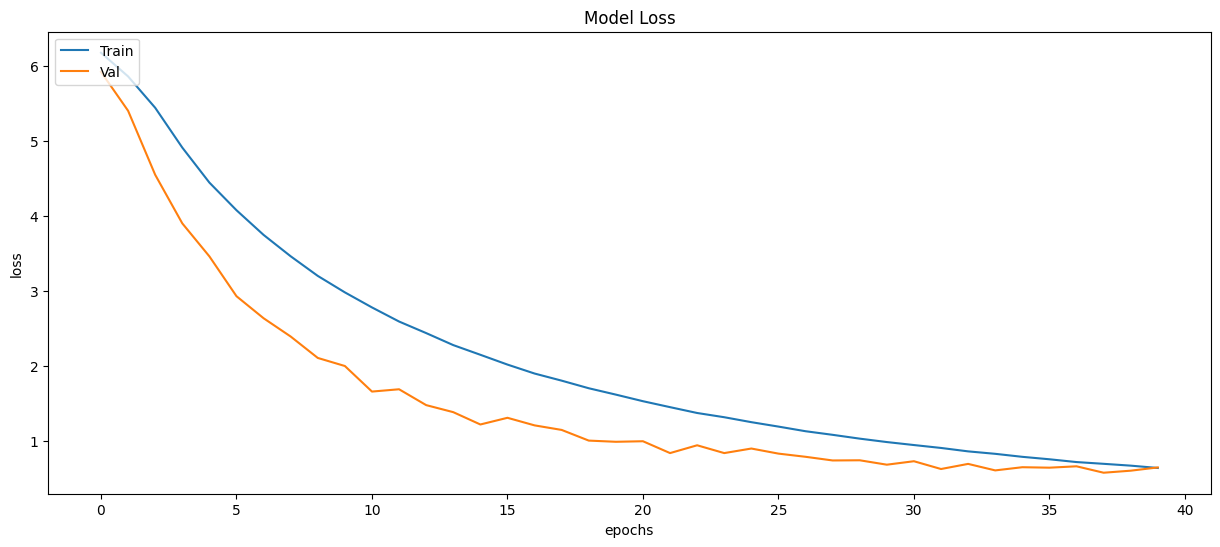

In [36]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

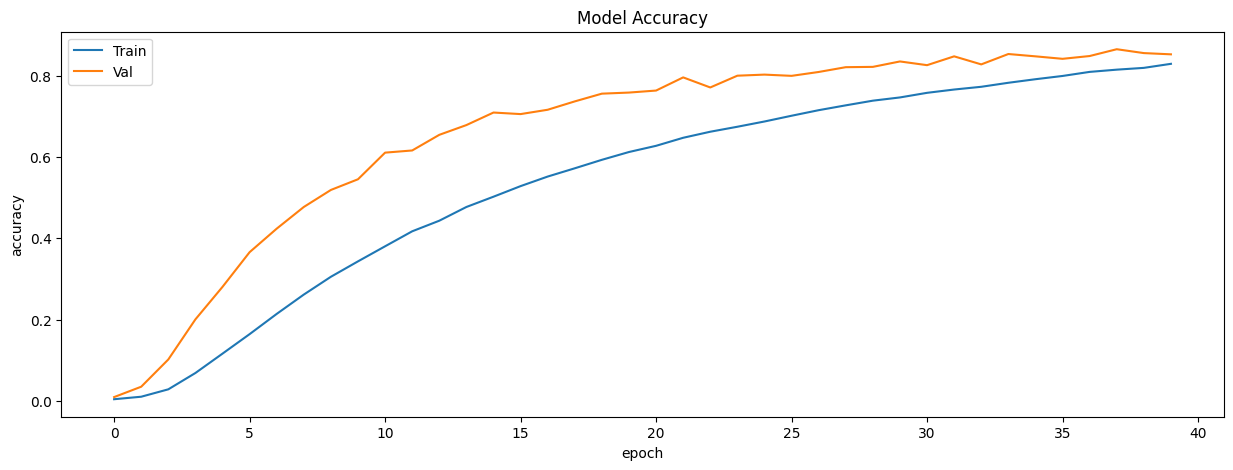

In [37]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [38]:
y_test_1 = test_generator.classes
y_pred_1 = model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

results =model.evaluate(test_generator)

83/83 [==============================] - 9s 112ms/step - loss: 0.4932 - accuracy: 0.8811
